# Returns (and getting data)

## Fetching data

In [150]:
# Python can quickly grab financial data
import pandas as pd
from pandas_datareader import DataReader as pdr
pd.options.display.float_format = '{:.2f}'.format

# 10-year Treasury Yield from FRED
y10 = pdr("DGS10", "fred", start="1929-12-01")


In [30]:
y10

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2022-10-18,4.01
2022-10-19,4.14
2022-10-20,4.24


<AxesSubplot:xlabel='DATE'>

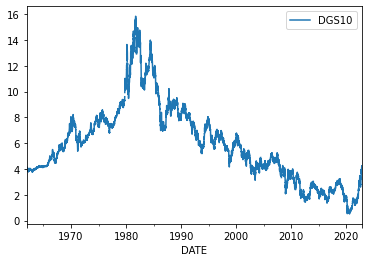

In [39]:
# A quick and dirty plot
y10.plot()

In [37]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=y10.index, y=y10.DGS10, mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [133]:
# Pull stock information
ticker = 'AAPL'
ret = pdr(ticker, "yahoo", start=2000)
ret

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,$1.00,$0.91,$0.94,$1.00,"$535,796,800.00",$0.85
2000-01-04,$0.99,$0.90,$0.97,$0.92,"$512,377,600.00",$0.78
2000-01-05,$0.99,$0.92,$0.93,$0.93,"$778,321,600.00",$0.79
2000-01-06,$0.96,$0.85,$0.95,$0.85,"$767,972,800.00",$0.72
2000-01-07,$0.90,$0.85,$0.86,$0.89,"$460,734,400.00",$0.76
...,...,...,...,...,...,...
2022-10-20,$145.89,$142.65,$143.02,$143.39,"$64,522,000.00",$143.39
2022-10-21,$147.85,$142.65,$142.87,$147.27,"$86,464,700.00",$147.27
2022-10-24,$150.23,$146.00,$147.19,$149.45,"$75,981,900.00",$149.45


In [134]:
# Keep just the last data adjusted close data point each month
ret = ret["Adj Close"].resample("M").last()
ret

Date
2000-01-31     $0.79
2000-02-29     $0.87
2000-03-31     $1.04
2000-04-30     $0.95
2000-05-31     $0.64
               ...  
2022-06-30   $136.53
2022-07-31   $162.28
2022-08-31   $157.22
2022-09-30   $138.20
2022-10-31   $149.18
Freq: M, Name: Adj Close, Length: 274, dtype: float64

In [135]:
# Calculate a return
ret = ret.pct_change()
ret

Date
2000-01-31      NaN
2000-02-29    $0.10
2000-03-31    $0.18
2000-04-30   $-0.09
2000-05-31   $-0.32
              ...  
2022-06-30   $-0.08
2022-07-31    $0.19
2022-08-31   $-0.03
2022-09-30   $-0.12
2022-10-31    $0.08
Freq: M, Name: Adj Close, Length: 274, dtype: float64

In [136]:
ret.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31'],
              dtype='datetime64[ns]', name='Date', length=274, freq='M')

In [137]:
ret.index = ret.index.to_period("M")
ret.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10'],
            dtype='period[M]', name='Date', length=274)

In [138]:
ret.name = "ret"
ret

Date
2000-01      NaN
2000-02    $0.10
2000-03    $0.18
2000-04   $-0.09
2000-05   $-0.32
           ...  
2022-06   $-0.08
2022-07    $0.19
2022-08   $-0.03
2022-09   $-0.12
2022-10    $0.08
Freq: M, Name: ret, Length: 274, dtype: float64

In [139]:
# Summary statistics
print(ret.mean())
print(ret.std())

0.02629347130371812
0.11397874806871462


<AxesSubplot:xlabel='Date'>

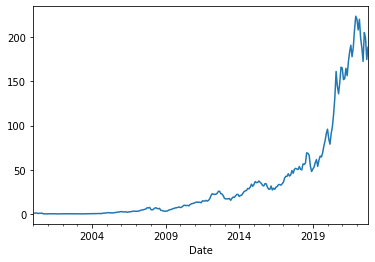

In [140]:
# Cumulative returns
(1+ret).cumprod().plot()

In [147]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=ret.index.to_timestamp("M"), y=(1+ret).cumprod(), mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [92]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = pdr(ticker, "yahoo", start=2000)
    ret = ret["Adj Close"].resample("M").last()
    ret = ret.pct_change()
    ret.index = ret.index.to_period("M")
    ret.name = ticker
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

In [93]:
df = pd.merge(left=ibm,right=aapl,how='inner',left_index=True,right_index=True)
df

,IBM,AAPL
Date,,
2000-01,NaN,NaN
2000-02,-0.083669,0.104820
2000-03,0.152068,0.184842
2000-04,-0.058079,-0.086517
2000-05,-0.036395,-0.322922
...,...,...
2022-06,0.016926,-0.081430
2022-07,-0.073660,0.188634
2022-08,-0.005517,-0.031208


In [94]:
df.corr()

,IBM,AAPL
IBM,1.000000,0.434675
AAPL,0.434675,1.000000


Mean of  50.00% portfolio is:  1.58% (per month)
Mean of  75.00% portfolio is:  2.11% (per month)


<AxesSubplot:xlabel='Date'>

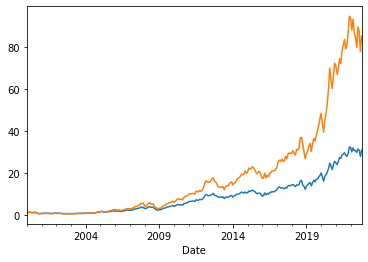

In [148]:
# How would different portfolios of AAPL and IBM have fared?

wgt = 0.5
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print('Mean of ' + f'{wgt: .2%}' + ' portfolio is: ' + f'{df.retp.mean(): .2%}' + ' (per month)')
df.cumretp.plot()


wgt = 0.75
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print('Mean of ' + f'{wgt: .2%}' + ' portfolio is: ' + f'{df.retp.mean(): .2%}' + ' (per month)')
df.cumretp.plot()


In [102]:
# Ken French data library at Dartmouth
# Some factors
ff3 = pdr('F-F_Research_Data_Factors','famafrench', start=1900)[0]/100

# Some industry portfolios
ff48 = pdr("48_Industry_Portfolios", "famafrench", start=1900)[0]/100



In [103]:
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-05,-0.0034,-0.0185,0.0841,0.0003
2022-06,-0.0843,0.0209,-0.0597,0.0006
2022-07,0.0957,0.0281,-0.0410,0.0008


In [158]:
# What does the following represent?
mrp = ff3['Mkt-RF'].mean()*12
print(f'{mrp:.2%}')

7.97%


In [151]:
ff48

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.02,0.00,-1.00,-0.05,0.01,0.09,0.03,0.50,-0.00,0.08,...,0.08,0.02,-0.24,0.00,0.02,0.05,-0.01,0.03,-0.06,0.05
1926-08,0.02,0.03,-1.00,0.27,0.07,0.17,-0.01,0.43,-0.04,-0.03,...,-0.02,0.05,0.05,-0.01,-0.00,0.12,0.03,0.05,0.00,0.07
1926-09,-0.01,0.02,-1.00,0.04,0.01,0.08,0.06,-0.05,0.01,-0.01,...,-0.06,0.00,-0.08,0.00,-0.01,-0.02,0.01,-0.03,-0.05,-0.04
1926-10,-0.00,-0.04,-1.00,-0.03,0.01,-0.01,-0.05,0.05,-0.05,0.00,...,-0.05,-0.03,-0.15,-0.02,-0.04,-0.12,-0.04,-0.06,-0.01,-0.08
1926-11,0.07,0.06,-1.00,0.07,0.05,0.00,0.02,-0.06,-0.01,0.02,...,0.04,0.02,0.05,0.07,0.04,-0.03,0.04,0.02,0.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05,0.07,-0.03,-0.00,-0.02,0.03,-0.01,-0.04,-0.07,-0.05,-0.06,...,-0.05,-0.05,0.01,-0.06,-0.03,0.03,0.01,-0.02,0.04,-0.01
2022-06,-0.12,-0.02,0.00,-0.00,-0.12,-0.13,-0.11,-0.12,-0.03,-0.12,...,-0.08,-0.07,-0.06,-0.09,-0.09,-0.12,-0.02,-0.14,-0.10,-0.13
2022-07,0.06,0.04,0.03,0.05,0.01,0.06,0.17,0.12,0.01,0.12,...,0.07,0.09,0.09,0.16,0.12,0.09,0.03,0.14,0.10,0.10


## Financial functions in Python

In [159]:
# What is the future value in 30 years if we invest a dollar today?
import numpy_financial as npf

r   = 0.04
nper= 30
pmt = 0
pv  = 1

fv = npf.fv(r, nper, -pmt, -pv)
print(f'${fv:0.2f}')

$3.24


In [160]:
# The value at each point in time
import numpy as np
fv_array = [npf.fv(r, n, -pmt, -pv) for n in np.arange(nper+1)]
fv_array

[1.0,
 1.04,
 1.0816000000000001,
 1.124864,
 1.1698585600000002,
 1.2166529024000001,
 1.2653190184960004,
 1.3159317792358403,
 1.3685690504052739,
 1.423311812421485,
 1.4802442849183444,
 1.5394540563150783,
 1.6010322185676815,
 1.6650735073103888,
 1.7316764476028044,
 1.8009435055069165,
 1.8729812457271933,
 1.947900495556281,
 2.0258165153785326,
 2.106849175993674,
 2.191123143033421,
 2.278768068754758,
 2.369918791504948,
 2.464715543165146,
 2.5633041648917523,
 2.665836331487422,
 2.772469784746919,
 2.883368576136796,
 2.998703319182268,
 3.118651451949559,
 3.2433975100275414]

<AxesSubplot:>

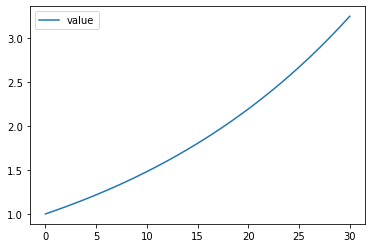

In [11]:
# We can put this in a pandas dataframe
import pandas as pd
fv_df = pd.DataFrame(fv_array, columns=['value'])
fv_df.plot()